# Python ile Bayesci Çıkarım (Bayesian Inference)
***

<p>Bayesyen çıkarım, temeli Bayes Teoremine dayandırılarak geliştirilmiş bir
çıkarım sistemidir. İstatistik gelişirken temel olarak iki farklı felsefi
yaklaşımın belirginleştiği görülmektedir. Bunlar Klasik (veya Frekansçı - Frequentist) yaklaşım ve Bayesci (Bayesian) yaklaşımlardır.</p>

<p>Hangi istatistiksel yaklaşım olduğundan bağımsız olarak, herhangi bir istatistiksel çıkarım paradigması aşağıdaki şeylerle ilgilenir:
</p>

1. Öğrenmek veya test etmekle ilgilendiğimiz bazı _bilinmeyen çokluklar_ (**quantity**). Bunlar **parametre** olarak adlandırılır.
2. Gözlemlediğimiz ve bilgi içermesini ümit ettiğimiz bazı **veriler**.
3. Veriler ve parametreler arasında ilişki kurmamıza yardım edecek **modeller**.

<p> Şimdi Frekansçı ve Bayesci bakış açılarına kısaca göz atalım.
</p>

## Frekansçı Bakış Açısı
* **Veriler** rasgeledir, çünkü veriler rasgele süreçlerin (**random processes**) bir sonucudur. 
* **Model parametreleri** sabit (**fixed**) kabul edilir. Bir parametrenin gerçek değeri bir bilinmeyen ve sabittir.

<p>Bu model matematiksel olarak:</p> 

$$f(y\mid\theta)$$ 

<p>şeklinde yazılabilir. Burada, $ f $ fonksiyonu, belirli $\theta$ parametreleri için verileri ($y$) argüman olarak kabul eder.</p>

## Bayesci Bakış Açısı
* **Veriler** sabittir. Veriler rasgele olsalar bile, bir kez defterinize/e-tablonuza/IPython defterinize yazıldıktan sonra değişmezler.
* **Model parametrelerinin** kendileri rasgele olmayabilirler, ancak Bayesciler parametre değerlerindeki belirsizlikleri tanımlamak için olasılık dağılımlarını kullanırlar, ve bu nedenle parametreler rasgele olarak değerlendirilir.

<p>Bu model matematiksel olarak:</p>

$$f(\theta\mid y)$$ 

<p> şeklinde yazılabilir.</p>
<p>Bayesci çıkarımda, frekansçı çıkarımın aksine, tek bir tahmin edici vardır: **Bayes Formulü**.</p>

<img src="bayes_formula.png">

<p>Burada:</p>

* **Prior probability**: Önsel olasılık, mevcut veri gözlemlenmeden önce bilinmeyen bir çokluk hakkında bilinenleri karakterize eder. Önceki çalışmalarda elde edilen bilgileri, parametreyi makul değerlere sınırlamak için kullanılabilir.
* **Likelihood functions**: Likelihood (?), gözlemlenen verideki bilgiyi temsil eder ve önsel olasılığı sonsal olasılığa (posterior probability) güncellemek için kullanılır.

<p>$Pr(y)$ ifadesi genelde doğrudan hesaplanamaz. Bu değer aslında paydaki değerin tüm $\theta$ değerleri üzerinden integraline eşittir:</p>


$$Pr(\theta|y) = \frac{Pr(y|\theta)Pr(\theta)}{\int Pr(y|\theta)Pr(\theta) d\theta}$$


## Üç adımda Bayesci Çıkarım
1. Modeli, olasılık dağılımları ile belirtin.
  1. Verilerin örnekleme dağılımları (**sampling distribution**) nedir?
  2. Bilinmeyen parametrelerdeki belirsizliğimizi en iyi hangi dağılım ile tanımlayabiliriz?
2. Sonsal dağılımı hesaplayın.
3. Modelinizi kontrol edin.
  1. Model veriye uyuyor mu?
  2. Sonuçlar makul mü?
  3. Çıktılar model yapısındaki değişikliklere duyarlı mı?

## PyMC3 ile Bir Örnek

Python ile Bayesci çıkarım için PyMC3 kütüphanesini kullanacağız. Bu kütüphaneyi kurmak için IPython defteri içerisinde

In [ ]:
!pip install pymc3

komutunu kullanabilirsiniz.

<p>İlk örneğimizde radon veri setini kullanacağız. Bu veri setinde, bir radyoaktif gaz olan radonunun miktarı birkaç eyaletteki tüm ilçelerdeki farklı hanelerde ölçülmüştür. Radon gazı, sigara içmeyenlerde akciğer kanserinin en yüksek nedenidir. </p>
<p> Verisetimizi içeri aktaralım:
</p>

In [1]:
import pandas as pd

radon = pd.read_csv("radon.csv", index_col = 0)
radon.head()

,idnum,state,state2,stfips,zip,region,typebldg,floor,room,basement,...,pcterr,adjwt,dupflag,zipflag,cntyfips,county,fips,Uppm,county_code,log_radon
0,5081.0,MN,MN,27.0,55735,5.0,1.0,1.0,3.0,N,...,9.7,1146.499190,1.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
1,5082.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,14.5,471.366223,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.832909
2,5083.0,MN,MN,27.0,55748,5.0,1.0,0.0,4.0,Y,...,9.6,433.316718,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,1.098612
3,5084.0,MN,MN,27.0,56469,5.0,1.0,0.0,4.0,Y,...,24.3,461.623670,0.0,0.0,1.0,AITKIN,27001.0,0.502054,0,0.095310
4,5085.0,MN,MN,27.0,55011,3.0,1.0,0.0,4.0,Y,...,13.8,433.316718,0.0,0.0,3.0,ANOKA,27003.0,0.428565,1,1.163151


<p>Sadece Hennepin ilçesinde ölçülen log-radon miktarlarına odaklanalım ve aşağıdaki sorular ile ilgilenelim:</p>
1. Hennepin ilçesinde ortalama log-radon değerinin 4 pCi / L'den büyük müdür?
2. Hennepin ilçesinde rasgele seçilen bir evin log-radon değerinin > 4 olma olasılığı nedir?

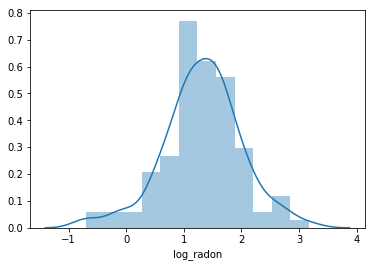

In [6]:
import seaborn as sns
%matplotlib inline

hennepin_radon = radon.query('county=="HENNEPIN"').log_radon
sns.distplot(hennepin_radon)

In [7]:
hennepin_radon.shape

(105,)

## Model
<p>Yukarıda da belirttiğimiz gibi Bayesci çıkarımın ilk adımı modeli tam olarak oluşturmaktır.</p>
<p>Modelimiz gözlemlerimiz için benzerlik (likelihood) fonksiyonu ve bilinmeyen çokluklarımız için önsel olasılıklarımızı içerir.</p>
<p>Yukarıdaki grafikten, ölçümlerimiz normal dağılıma uyuyor gibi gözüktüğünden, verimiz için örnekleme dağılımımızı normal dağılım olarak seçelim:</p>
<img src="normal_dist.svg">
<p>Dolayısıyla, modelimizde iki bilinmeyen var: dağılımın ortalaması ve standart sapması.</p>

## Önsel Seçim

<p>Bu parametrelerin önsel dağılımlarını nasıl seçeceğiz?</p>
<p>Bu seçimler için birkaç husus var:</p>

1. Değerler sürekli mi kesikli mi?
2. Bu değişkenlerin alabileceği değerler neler?
3. Elimizde olan önsel bilgiler

<p>Radon dağılımı ile ilgili elimizde önsel bilgi olması muhtemel olsa da, herhangi bir önsel bilgi kullanmayacağız.</p>
<p>Dağılımın ortalaması herhangi bir gerçel değer alabildiğinden, normal dağılım kullanacağız. Ayrıca çok büyük veya küçük değerleri mümkün kılmak için büyük bir varyans belirleyeceğiz:</p>
<img src="mu.svg">
<p>Standart sapma, pozitif olacağından dolayı (negatif varyans olamaz!), sıfır ile alttan sınırlanmış büyük bir aralık kullanacağız (düzgün dağılım - uniform dist.):</p>
<img src="sigma.svg">
<p>Bu modeli PyMC3 ile yazalım:</p>

In [16]:
from pymc3 import Model, Uniform, Normal

with Model() as radon_model:
    
    μ = Normal('μ', mu=0, sd=10)
    σ = Uniform('σ', 0, 10)

Şimdi likelihood fonksiyonumuzu yazalım:

In [17]:
with radon_model:
    
    y = Normal('y', mu=μ, sd=σ, observed=hennepin_radon)

Modelimizi uyduralım(fitting) ve sonsal dağılımımızdan örnekler seçelim:

In [18]:
from pymc3 import fit

with radon_model:
    
    samples = fit().sample(10000)

Average Loss = 135.53: 100%|██████████| 10000/10000 [00:04<00:00, 2014.93it/s]
Finished [100%]: Average Loss = 135.53


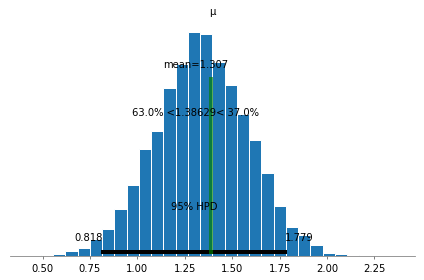

In [19]:
from pymc3 import plot_posterior
import numpy as np

plot_posterior(samples, varnames=['μ'], ref_val=np.log(4))

<p>Grafik, $\mu$ değişkeninin sonsal dağılımını ve %95 sonsal güven aralığını göstermektedir.</p>
<p>63.0% < 1.38629 < 37.0% sonucu bize, $\mu $ değişkeninin $log(4)$ 'den küçük olma olasılığının %63, büyük olma olasılığının ise %37 olduğunu verir. Dolayısıyla aşağıdaki çıkarımı yapabiliriz:
</p>

> Hennepin ilçesinde ortalama log-radon değerinin 4 pCi / L'den büyük olma olasılığı 0.37 dir.


## Tahmin

<p>Bir evin belirli bir seviyeden daha yüksek log-radon ölçümüne sahip olma olasılığı nedir? Bunu cevaplamak için sonsal tahmin dağılımını kullanırız.</p>

<img src="post_pred_dist.svg">

<p> Bu formülde $z $ tahmin edilen değer, $y $ ise modelimizi uydururken kullandığımız veridir. Bu tahmini parametrelerin sonsal dağılımlarından elde edebiliriz: </p>

In [20]:
mus = samples['μ']
sigmas = samples['σ']

radon_samples = Normal.dist(mus, sigmas).random()
(radon_samples > np.log(4)).mean()

0.46750000000000003

> Hennepin ilçesinde rasgele seçilen bir evin radon ölçümünün $log(4) $ değerinden büyük olma sonsal olasılığı 0.47 dir.

## Modeli Kontrol Etme

_**Bir modelin iyi olup olmadığını nasıl bileceğiz?**_

<p>Modelin uygunluğunu kontrol etmek için bir yöntem, sonsal tahmini kontroller yapmaktır. Bunun için, gözlenmiş veriler ile modelimiz ile yaptığımız simülasyon verilerini karşılaştıracağız:</p>

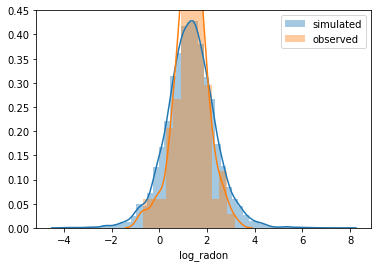

In [22]:
import matplotlib.pyplot as plt

sns.distplot(radon_samples, label="simulated")
sns.distplot(hennepin_radon, label="observed")
plt.legend()

## Önsel Hassasiyet

<p> Önsel seçimlerimiz, çıkarımımızı nasıl etkiliyor? Aşağıda, aynı modeli farklı önsel seçimler ile uyduracağız: </p>

In [23]:
from pymc3 import Flat, HalfCauchy

with Model() as prior_sensivity:
    
    μ = Flat('μ')
    σ = HalfCauchy('σ', 5)
    
    dist = Normal('dist', mu=μ, sd=σ, observed=hennepin_radon)

    sensitivity_samples = fit().sample(10000)


Average Loss = 123.28: 100%|██████████| 10000/10000 [00:04<00:00, 2013.96it/s]
Finished [100%]: Average Loss = 123.28


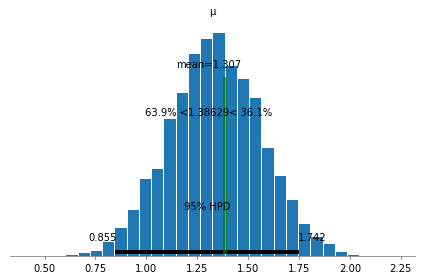

In [27]:
plot_posterior(sensitivity_samples, varnames=['μ'], ref_val=np.log(4))

Bu da ilk modelimiz:

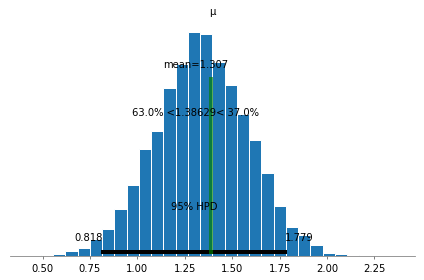

In [28]:
plot_posterior(samples, varnames=['μ'], ref_val=np.log(4))

## KAYNAKÇA
1. Ekici, O. (2009, Haziran). İstatistikte Bayesyen ve Klasik Yaklaşımın Kavramsal Farklılıkları. Balıkesir Üniversitesi Sosyal Bilimler Enstitüsü Dergisi, 12(21), 89-101.
2. Gelman, A., Carlin, J. B., Stern, H. S., Dunson, D. B., Vehtari, A., & Rubin, D. B. (2013). Bayesian Data Analysis, Third Edition. CRC Press.
3. Kruschke, J.K. Doing Bayesian Data Analysis, Second Edition: A Tutorial with R, JAGS, and Stan. 2015. Academic Press / Elsevier.
4. O'Shea M, Savitz D.A., Hage M.L., Feinstein K.A.: Prenatal events and the risk of subependymal / intraventricular haemorrhage in very low birth weight neonates. Paediatric and Perinatal Epdiemiology 1992;6:352-362